
#Perceptron Model 1957
Dans cet exemple nous allons utiliser la bibliothèque sklearn pour implémenter un Perceptron (modèle 1957) et travailler sur les données du dataset IRIS (qui datent de 1936) !


## Objectifs :
 - Implémenter un classifieur linéaire historique avec un dataset historique !
 - L'objectif est de prédire la variété d'Iris à partir de la taille de ses pétales/sépales.
 - Identifier les limitations d'un seul neurone  

Le [dataset IRIS](https://archive.ics.uci.edu/ml/datasets/Iris) est probablement l'un des plus anciens datasets, datant de 1936.

## Ce qu'on fera :
 - Récupérérer le dataset via la bibliothèque scikit-learn
 - l'entraîner et faire une classification

## Etape 1 - Importation des bibliothèques et initialisation

In [1]:
import numpy as np
from sklearn.datasets     import load_iris
from sklearn.linear_model import Perceptron
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import os,sys


## Etape 2 - Préparer le dataset IRIS

La plupart des bibliothèques de machine learning ont des datasets "exemple" directement accessibles
Dans le cas de Scikit-Learn, ces datasets se trouvent dans le module suivant :
Comment récupérer un dataset : http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets  
La liste des datesets : http://scikit-learn.org/stable/datasets/index.html  

Les différents attributs (X) :
- 0 : sepal length in cm
- 1 : sepal width in cm
- 2 : petal length in cm
- 3 : petal width in cm  

Les classes (y) :
- 0 : class 0=Iris-Setosa, 1=Iris-Versicolour, 2=Iris-Virginica

### 2.1 - Charger le dataset

In [2]:
x0,y0 = load_iris(return_X_y=True)

x = x0[:, (2,3)]     # nous allons garder juste les features 2 et 3 (données des pétales)
y = y0.copy()

y[ y0==0 ] = 1       # 1 = Iris setosa
y[ y0>=1 ] = 0       # 0 = not iris setosa

df=pd.DataFrame.from_dict({'Length (x1)':x[:,0], 'Width (x2)':x[:,1], 'Setosa {0,1} (y)':y})
display(df)

print(f'x shape : {x.shape}')
print(f'y shape : {y.shape}')

,Length (x1),Width (x2),"Setosa {0,1} (y)"
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


x shape : (150, 2)
y shape : (150,)


### 2.2 - Créer les datasets d'entraînement (Train) et de Test

In [3]:
def shuffle_np_dataset(x, y): # fonction pour mélanger aléatoirement le dataset
    """
    Shuffle a dataset (x,y)
    args:
        x,y : dataset
    return:
        x,y mixed
    """
    assert (len(x) == len(y)), "x and y must have same size"
    p = np.random.permutation(len(x))
    return x[p], y[p]

x,y = shuffle_np_dataset(x, y)
    
n=int(len(x)*0.8)
x_train = x[:n]
y_train = y[:n]
x_test  = x[n:]
y_test  = y[n:]

print(f'x_train shape : {x_train.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'x_test shape  : {x_test.shape}')
print(f'y_test shape  : {y_test.shape}')

x_train shape : (120, 2)
y_train shape : (120,)
x_test shape  : (30, 2)
y_test shape  : (30,)


## Step 3 - Créer un perceptron et l'entraîner

In [4]:
pct = Perceptron(max_iter=100, random_state=82, tol=0.01, verbose=1)
# nous avons limité l'entraînement à un max de 100 itérations
# l'option "tol" permet d'arrêter l'entraînement plus tôt, si le gain est inférieur à 0.01

pct.fit(x_train, y_train)

-- Epoch 1
Norm: 2.69, NNZs: 2, Bias: 5.000000, T: 120, Avg. loss: 0.273583
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.69, NNZs: 2, Bias: 5.000000, T: 240, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.69, NNZs: 2, Bias: 5.000000, T: 360, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.69, NNZs: 2, Bias: 5.000000, T: 480, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.69, NNZs: 2, Bias: 5.000000, T: 600, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.69, NNZs: 2, Bias: 5.000000, T: 720, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 2.69, NNZs: 2, Bias: 5.000000, T: 840, Avg. loss: 0.000000
Total training time: 0.01 seconds.
Convergence after 7 epochs took 0.01 seconds


Perceptron(max_iter=100, random_state=82, tol=0.01, verbose=1)

## Etape 4 - Prédictions

Le perceptron a été entraîné uniquement sur les données Train. On peut maintenant faire des estimations avec les données Test.
Les colonnes `y_test`et `y_pred` correspondent respectivement aux labels du dataset et aux labels prédicts.

In [5]:
y_pred = pct.predict(x_test) 

df=pd.DataFrame.from_dict({'Length (x1)':x_test[:,0], 'Width (x2)':x_test[:,1], 'y_test':y_test, 'y_pred':y_pred})
display(df[:15])

,Length (x1),Width (x2),y_test,y_pred
0,5.9,2.3,0,0
1,5.8,2.2,0,0
2,4.7,1.4,0,0
3,1.5,0.2,1,1
4,5.1,1.5,0,0
5,1.3,0.2,1,1
6,1.1,0.1,1,1
7,6.3,1.8,0,0
8,5.9,2.1,0,0
9,5.6,2.4,0,0


## Step 5 - Visualisation

Le paragraphe suivant fait la visualisation des données précédentes. Il affiche les données Train (en couleurs foncées) et les données Test. Les couleurs correspondent aux labels, et la ligne pointillée montre la séparation faite par le perceptron.

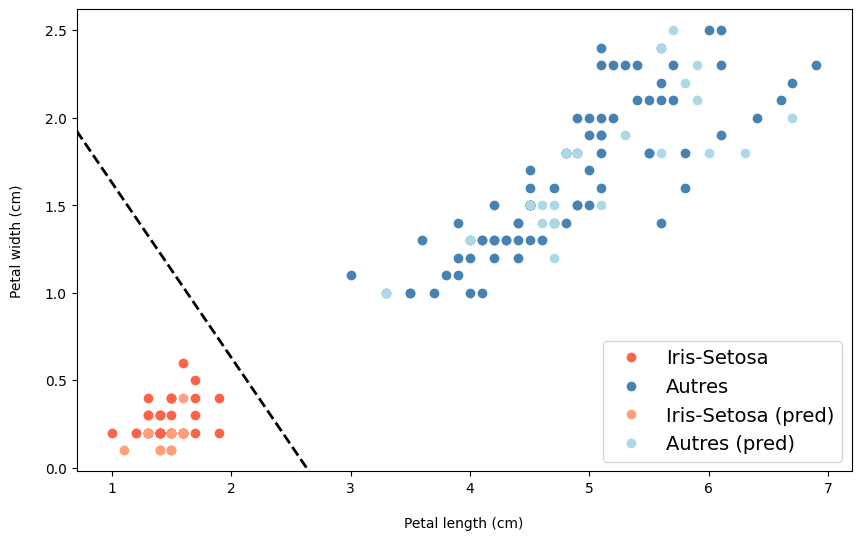

In [6]:
def plot_perceptron(x_train,y_train,x_test,y_test):
    a = -pct.coef_[0][0] / pct.coef_[0][1]
    b = -pct.intercept_ / pct.coef_[0][1]
    box=[x.min(axis=0)[0],x.max(axis=0)[0],x.min(axis=0)[1],x.max(axis=0)[1]]
    mx=(box[1]-box[0])/20
    my=(box[3]-box[2])/20
    box=[box[0]-mx,box[1]+mx,box[2]-my,box[3]+my]

    fig, axs = plt.subplots(1, 1)
    fig.set_size_inches(10,6)
 
    axs.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], "o", color='tomato', label="Iris-Setosa")
    axs.plot(x_train[y_train==0, 0], x_train[y_train==0, 1], "o", color='steelblue',label="Autres")
    
    axs.plot(x_test[y_pred==1, 0],   x_test[y_pred==1, 1],   "o", color='lightsalmon', label="Iris-Setosa (pred)")
    axs.plot(x_test[y_pred==0, 0],   x_test[y_pred==0, 1],   "o", color='lightblue',   label="Autres (pred)")
    
    axs.plot([box[0], box[1]], [a*box[0]+b, a*box[1]+b], "k--", linewidth=2)
    axs.set_xlabel("Petal length (cm)", labelpad=15) #, fontsize=14)
    axs.set_ylabel("Petal width (cm)",  labelpad=15) #, fontsize=14)
    axs.legend(loc="lower right", fontsize=14)
    axs.set_xlim(box[0],box[1])
    axs.set_ylim(box[2],box[3])
    plt.show()
    
plot_perceptron(x_train,y_train, x_test,y_test)